<a href="https://colab.research.google.com/github/Raudhil/Machine-Learning-2025/blob/main/Jobsheet%2011/RAUDHIL_FIRDAUS_NAUFAL_JS11_Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 5**

Klasifikasi Citra Siang dan Malang



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/images/images/training/"
test_dir = "/content/drive/MyDrive/images/images/test/"

**Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training




In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.




In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        [[ 57,  37,  26],
         [ 57,  37,  26],
         [ 57,  37,  26],
         ...,
         [ 71,  45,  32],
         [ 71,  45,  32],
         [ 71,  45,  32]],
 
        ...,
 
        [[198, 125,  84],
         [155,  91,  47],
         [140,  88,  40],
         ...,
         [117,  64,  20],
         [117,  64,  20],
         [117,  64,  20]],
 
        [[159,  91,  54],
         [194, 135,  95],
         [151, 107,  62],
         ...,
         [116,  63,  21],
         [116,  63,  21],
         [116,  63,  21]],
 
        [[187, 123,  87],
         [252, 197, 158],
         [223, 180, 138],
         ...,
         [116,  63,  21],
  

Cek ukuran gambar secara acak




In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 8
(469, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar




In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak




Shape	: (458, 800, 3)
Label	: day


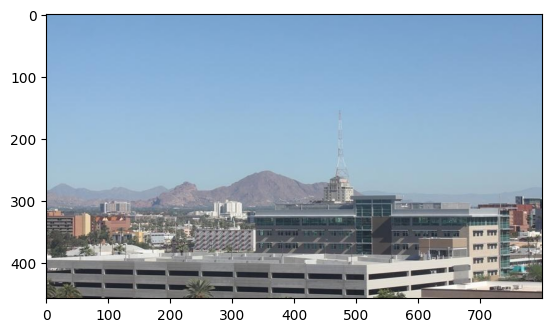

In [ ]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengolahan Data**

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.




In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.




In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.




In [ ]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.




In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 146
(600, 1100, 3)
